In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
import random
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means

random.seed(0)

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

In [4]:
save_site = 'all_locations'

all_sites_call_signals = np.array([],dtype='object')
all_sites_call_info = pd.DataFrame()
for site_key in SITE_NAMES.keys():
    input_dir = Path(f'../data/detected_calls/{site_key}')
    input_file_type = 'top1_inbouts_call_signals'
    if (input_dir / f'2022_{site_key}_{input_file_type}.npy').exists():
        print(site_key)
        location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
        print(location_call_signals.shape)
        location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)
        location_calls_sampled['index'] = location_calls_sampled.index

        all_sites_call_info = pd.concat([all_sites_call_info, location_calls_sampled])
        all_sites_call_signals=np.concatenate([all_sites_call_signals, location_call_signals])
        print(all_sites_call_signals.shape)


Central
(25676,)
(25676,)
Foliage
(56991,)
(82667,)
Carp
(42307,)
(124974,)
Telephone
(46565,)
(171539,)


In [5]:
all_sites_call_info = all_sites_call_info.reset_index(drop=True)
all_sites_call_info['index'] = all_sites_call_info.index
all_sites_call_info

,index,bout_index,SD_card,file_name,site,SNR,sampling_rate,start_time_wrt_ref,end_time_wrt_ref,index_in_file,...,event,class,class_prob,det_prob,individual,input_file,Site name,Recover Folder,SD Card,File Duration
0,0,0,UBNA_008,20220726_043000.WAV,Central Pond,8.895650,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,UBNA_008,20220726_043000.WAV,Central Pond,8.256141,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,UBNA_008,20220726_043000.WAV,Central Pond,35.272173,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,UBNA_008,20220726_043000.WAV,Central Pond,9.727060,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3,UBNA_008,20220726_043000.WAV,Central Pond,9.746170,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171534,171534,45,NaN,20221017_133000.WAV,NaN,24.502263,192000,945.6925,945.6987,608.0,...,Echolocation,Pipistrellus pipistrellus,0.532,0.627,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171535,171535,46,NaN,20221017_133000.WAV,NaN,8.592850,192000,966.2425,966.2483,622.0,...,Echolocation,Pipistrellus pipistrellus,0.619,0.692,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171536,171536,47,NaN,20221017_133000.WAV,NaN,9.164494,192000,978.5655,978.5707,631.0,...,Echolocation,Pipistrellus pipistrellus,0.633,0.650,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171537,171537,48,NaN,20221017_133000.WAV,NaN,13.295326,192000,729.4345,729.4387,494.0,...,Echolocation,Myotis mystacinus,0.236,0.538,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN


In [6]:
snr_thresh = 0
good_snr_location_calls_sampled = all_sites_call_info.loc[all_sites_call_info['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.set_index(keys=np.arange(len(good_snr_location_calls_sampled)), inplace=True)
good_snr_location_calls_sampled

,index,bout_index,SD_card,file_name,site,SNR,sampling_rate,start_time_wrt_ref,end_time_wrt_ref,index_in_file,...,event,class,class_prob,det_prob,individual,input_file,Site name,Recover Folder,SD Card,File Duration
0,0,0,UBNA_008,20220726_043000.WAV,Central Pond,8.895650,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,UBNA_008,20220726_043000.WAV,Central Pond,8.256141,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,UBNA_008,20220726_043000.WAV,Central Pond,35.272173,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,UBNA_008,20220726_043000.WAV,Central Pond,9.727060,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3,UBNA_008,20220726_043000.WAV,Central Pond,9.746170,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171534,171534,45,NaN,20221017_133000.WAV,NaN,24.502263,192000,945.6925,945.6987,608.0,...,Echolocation,Pipistrellus pipistrellus,0.532,0.627,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171535,171535,46,NaN,20221017_133000.WAV,NaN,8.592850,192000,966.2425,966.2483,622.0,...,Echolocation,Pipistrellus pipistrellus,0.619,0.692,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171536,171536,47,NaN,20221017_133000.WAV,NaN,9.164494,192000,978.5655,978.5707,631.0,...,Echolocation,Pipistrellus pipistrellus,0.633,0.650,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN
171537,171537,48,NaN,20221017_133000.WAV,NaN,13.295326,192000,729.4345,729.4387,494.0,...,Echolocation,Myotis mystacinus,0.236,0.538,-1.0,/mnt/ubna_data_02_mir/recover-20221017/UBNA_00...,Telephone Field,recover-20221017,007,NaN


In [86]:
PADDED_CALL_LENGTH = 0.06

def plot_call_centered(calls_sampled, call_signals, audio_info):
    call_info = calls_sampled.loc[audio_info['call_index']]
    fs = call_info['sampling_rate']
    call = call_signals[call_info['index']]
    padded_call = compute_features.pad_call_ms(call, fs, PADDED_CALL_LENGTH)

    plt.title(audio_info['plot_title'], fontsize=12, weight='bold')
    plt.plot(padded_call)
    time_labels = (np.linspace(0,1000*round(len(padded_call)/fs, 2), 11).astype('int')).astype('str')
    time_labels[1::2] = ''
    plt.xticks(ticks=np.linspace(0,len(padded_call), 11), labels=time_labels, rotation=45)
    ax = plt.gca()
    # plt.text(x=0.4, y=0.05, s=f'SNR:{round(call_info["SNR"], 1)}', color='black', fontweight='bold', transform=ax.transAxes)

    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (V)')
    plt.grid(which='both')

def plot_call_spectrogram_centered(calls_sampled, call_signals, audio_info):
    call_info = calls_sampled.loc[audio_info['call_index']]
    fs = call_info['sampling_rate']
    call = call_signals[call_info['index']]
    padded_call = compute_features.pad_call_ms(call, fs, PADDED_CALL_LENGTH)

    padded_call_dur = round(len(call)/fs, 2)
    plt.title(audio_info['plot_title'], fontsize=12, weight='bold')
    plt.specgram(call, NFFT=132, cmap='jet', vmin=-60)
    time_labels = (np.linspace(0,1000*padded_call_dur, 11).astype('int')).astype('str')
    time_labels[1::2] = ''
    plt.xticks(ticks=np.linspace(0,round(len(call)/2), 11), labels=time_labels, rotation=45)
    ax = plt.gca()
    # plt.text(x=0.4, y=0.05, s=f'SNR:{round(call_info["SNR"], 1)}', color='white', fontweight='bold', transform=ax.transAxes)

    low_end = 0
    high_end = 96000
    freq_labels = (np.linspace(low_end/1000, high_end/1000, 11)).astype('int').astype('str')
    if not(audio_info['show_yaxis_fine']):
        freq_labels[1::2] = ''
    plt.yticks(ticks=np.linspace(2*low_end/(fs), 2*high_end/(fs), 11), labels=freq_labels, rotation=45)
    plt.ylim(2*low_end/(fs), 2*high_end/(fs))
    plt.xlabel('Time (ms)')
    plt.ylabel('Frequency (kHz)')
    plt.grid(which='both')

def plot_call_welch_interpolated(calls_sampled, call_signals, audio_info):
    call_info = calls_sampled.loc[audio_info['call_index']]
    fs = call_info['sampling_rate']
    call = call_signals[call_info['index']]
    max_visible_frequency = 96000
    audio_info['max_freq_visible'] = max_visible_frequency

    normwelch, threshwelch, interpwelch = compute_welch_psd_of_call(call, fs, audio_info)

    welch_signal = interpwelch
    plt.title(audio_info['plot_title'], fontsize=12, weight='bold')
    plot_freqs = np.linspace(0, max_visible_frequency, len(welch_signal))
    plt.plot(plot_freqs, welch_signal, color='blue')
    # plt.plot(plot_freqs, welch_signal, label=f'SNR:{round(call_info["SNR"], 1)}', color='blue')
    plt.text(x=0.5e4, y=-50, s=f'{len(welch_signal)} points')
    freq_labels = np.linspace(0, max_visible_frequency/(1000), 9, dtype='int').astype('str')
    if not(audio_info['show_yaxis_fine']):
        freq_labels[1::2] = ''
    plt.xticks(ticks=np.linspace(0, max_visible_frequency, 9), labels=freq_labels, rotation=45)
    plt.ylabel("FFT Magnitude (dB)")
    plt.xlabel("Frequency (kHz)")
    plt.xlim(0, max_visible_frequency)
    plt.ylim(-110, 10)
    plt.grid(which='both')
    # plt.legend(loc='lower center')

def plot_call_welch_thresh(calls_sampled, call_signals, audio_info):
    call_info = calls_sampled.loc[audio_info['call_index']]
    fs = call_info['sampling_rate']
    call = call_signals[call_info['index']]
    max_visible_frequency = 96000
    audio_info['max_freq_visible'] = max_visible_frequency

    normwelch, threshwelch, interpwelch = compute_welch_psd_of_call(call, fs, audio_info)

    welch_signal = threshwelch
    plt.title(audio_info['plot_title'], fontsize=12, weight='bold')
    plot_freqs = np.linspace(0, max_visible_frequency, len(welch_signal))
    plt.plot(plot_freqs, welch_signal, color='blue')
    # plt.plot(plot_freqs, welch_signal, label=f'SNR:{round(call_info["SNR"], 1)}', color='blue')
    plt.text(x=0.5e4, y=-50, s=f'{len(welch_signal)} points')
    freq_labels = np.linspace(0, max_visible_frequency/(1000), 9, dtype='int').astype('str')
    if not(audio_info['show_yaxis_fine']):
        freq_labels[1::2] = ''
    plt.xticks(ticks=np.linspace(0, max_visible_frequency, 9), labels=freq_labels, rotation=45)
    plt.ylabel("FFT Magnitude (dB)")
    plt.xlabel("Frequency (kHz)")
    plt.xlim(0, max_visible_frequency)
    plt.ylim(-110, 10)
    plt.grid(which='both')
    # plt.legend(loc='lower center')

def plot_call_welch_norm(calls_sampled, call_signals, audio_info):
    call_info = calls_sampled.loc[audio_info['call_index']]
    fs = call_info['sampling_rate']
    call = call_signals[call_info['index']]
    max_visible_frequency = 96000
    audio_info['max_freq_visible'] = max_visible_frequency

    normwelch, threshwelch, interpwelch = compute_welch_psd_of_call(call, fs, audio_info)

    welch_signal = normwelch
    plt.title(audio_info['plot_title'], fontsize=12, weight='bold')
    plot_freqs = np.linspace(0, max_visible_frequency, len(welch_signal))
    plt.plot(plot_freqs, welch_signal, color='blue')
    # plt.plot(plot_freqs, welch_signal, label=f'SNR:{round(call_info["SNR"], 1)}', color='blue')
    plt.text(x=0.5e4, y=-50, s=f'{len(welch_signal)} points')
    freq_labels = np.linspace(0, max_visible_frequency/(1000), 9, dtype='int').astype('str')
    if not(audio_info['show_yaxis_fine']):
        freq_labels[1::2] = ''
    plt.xticks(ticks=np.linspace(0, max_visible_frequency, 9), labels=freq_labels, rotation=45)
    plt.ylabel("FFT Magnitude (dB)")
    plt.xlabel("Frequency (kHz)")
    plt.xlim(0, max_visible_frequency)
    plt.ylim(-110, 10)
    plt.grid(which='both')
    # plt.legend(loc='lower center')

def compute_welch_psd_of_call(call, fs, audio_info):
    freqs, welch = scipy.signal.welch(call, fs=fs, detrend=False, scaling='spectrum')
    cropped_welch = welch[(freqs<=audio_info['max_freq_visible'])]
    audio_spectrum_mag = np.abs(cropped_welch)
    audio_spectrum_db =  10*np.log10(audio_spectrum_mag)
    normalized_audio_spectrum_db = audio_spectrum_db - audio_spectrum_db.max()

    thresh = -100
    peak_db = np.zeros(len(normalized_audio_spectrum_db))+thresh
    peak_db[normalized_audio_spectrum_db>=thresh] = normalized_audio_spectrum_db[normalized_audio_spectrum_db>=thresh]

    original_freq_vector = np.arange(0, len(peak_db), 1).astype('int')
    common_freq_vector = np.linspace(0, len(peak_db)-1, audio_info['num_points']).astype('int')
    interp_kind = 'linear'
    interpolated_points_from_welch = scipy.interpolate.interp1d(original_freq_vector, peak_db, kind=interp_kind)(common_freq_vector)

    return normalized_audio_spectrum_db, peak_db, interpolated_points_from_welch


In [74]:
def plot_n_calls(call_indices, calls_sampled, call_signals, set_name):
    side = len(call_indices)
    plt.figure(figsize=(3*side, 3.4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'{side} call signals (waveform) from {set_name}', y=1, fontsize=side*5)
    for subplot_i, call_index in enumerate(call_indices):
        call_info = calls_sampled.loc[call_index]
        file_name = call_info['file_name']
        datetime = dt.datetime.strptime(file_name, "%Y%m%d_%H%M%S.WAV")

        plt.subplot(1, side, subplot_i+1)
        audio_info = dict()
        audio_info['call_index'] = call_index
        audio_info['plot_title'] = f'{(datetime).strftime("%m/%d/%y %H:%M")}'
        audio_info['show_yaxis_fine'] = False
        plot_call_centered(calls_sampled, call_signals, audio_info)

    plt.tight_layout()
    plt.show()

def plot_n_specs(call_indices, calls_sampled, call_signals, set_name):
    side = len(call_indices)
    plt.figure(figsize=(2.8*side, 3.5))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'{side} call signals (spectrogram) from {set_name}', y=1, fontsize=side*5)
    for subplot_i, call_index in enumerate(call_indices):
        call_info = calls_sampled.loc[call_index]
        file_name = call_info['file_name']
        datetime = dt.datetime.strptime(file_name, "%Y%m%d_%H%M%S.WAV")

        plt.subplot(1, side, subplot_i+1)
        audio_info = dict()
        audio_info['call_index'] = call_index
        audio_info['plot_title'] = f'{(datetime).strftime("%m/%d/%y %H:%M")}'
        audio_info['show_yaxis_fine'] = False
        plot_call_spectrogram_centered(calls_sampled, call_signals, audio_info)

    plt.tight_layout()
    plt.show()

def plot_n_welch_interp(call_indices, calls_sampled, call_signals, set_name):
    side = len(call_indices)
    num_points = 100
    plt.figure(figsize=(3*side, 3.4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'{side} welch spectra from {set_name}', y=1, fontsize=side*5)
    for subplot_i, call_index in enumerate(call_indices):
        call_info = calls_sampled.loc[call_index]
        file_name = call_info['file_name']
        datetime = dt.datetime.strptime(file_name, "%Y%m%d_%H%M%S.WAV")

        plt.subplot(1, side, subplot_i+1)
        audio_info = dict()
        audio_info['call_index'] = call_index
        audio_info['plot_title'] = f'{(datetime).strftime("%m/%d/%y %H:%M")}'
        audio_info['num_points'] = num_points
        audio_info['show_yaxis_fine'] = False
        plot_call_welch_interpolated(calls_sampled, call_signals, audio_info)
        
    plt.tight_layout()
    plt.show()

def plot_n_welch_thresh(call_indices, calls_sampled, call_signals, set_name):
    side = len(call_indices)
    num_points = 100
    plt.figure(figsize=(3*side, 3.4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'{side} welch spectra from {set_name}', y=1, fontsize=side*5)
    for subplot_i, call_index in enumerate(call_indices):
        call_info = calls_sampled.loc[call_index]
        file_name = call_info['file_name']
        datetime = dt.datetime.strptime(file_name, "%Y%m%d_%H%M%S.WAV")

        plt.subplot(1, side, subplot_i+1)
        audio_info = dict()
        audio_info['call_index'] = call_index
        audio_info['plot_title'] = f'{(datetime).strftime("%m/%d/%y %H:%M")}'
        audio_info['num_points'] = num_points
        audio_info['show_yaxis_fine'] = False
        plot_call_welch_thresh(calls_sampled, call_signals, audio_info)
        
    plt.tight_layout()
    plt.show()

def plot_n_welch_norm(call_indices, calls_sampled, call_signals, set_name):
    side = len(call_indices)
    num_points = 100
    plt.figure(figsize=(3*side, 3.4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'{side} welch spectra from {set_name}', y=1, fontsize=side*5)
    for subplot_i, call_index in enumerate(call_indices):
        call_info = calls_sampled.loc[call_index]
        file_name = call_info['file_name']
        datetime = dt.datetime.strptime(file_name, "%Y%m%d_%H%M%S.WAV")

        plt.subplot(1, side, subplot_i+1)
        audio_info = dict()
        audio_info['call_index'] = call_index
        audio_info['plot_title'] = f'{(datetime).strftime("%m/%d/%y %H:%M")}'
        audio_info['num_points'] = num_points
        audio_info['show_yaxis_fine'] = False
        plot_call_welch_norm(calls_sampled, call_signals, audio_info)
        
    plt.tight_layout()
    plt.show()

In [8]:
n = 5
set_name = 'representative set'

In [9]:
call_indices = random.sample(range(0, len(good_snr_location_calls_sampled)), n)
call_indices = np.sort(call_indices)

In [10]:
call_indices

array([ 10612,  67873, 100989, 110250, 134027])

In [50]:
row_df = good_snr_location_calls_sampled.loc[(good_snr_location_calls_sampled['file_name']=='20220820_053000.WAV')&(good_snr_location_calls_sampled['bout_index']==13)&(good_snr_location_calls_sampled['SNR']>12)]
row_df = pd.concat([row_df, good_snr_location_calls_sampled.loc[(good_snr_location_calls_sampled['file_name']=='20220628_080000.WAV')&(good_snr_location_calls_sampled['bout_index']==69)]])
row_df = pd.concat([row_df, good_snr_location_calls_sampled.loc[(good_snr_location_calls_sampled['file_name']=='20220723_100000.WAV')&(good_snr_location_calls_sampled['bout_index']==10)&(good_snr_location_calls_sampled['SNR']>7)]])
row_df = pd.concat([row_df, good_snr_location_calls_sampled.loc[(good_snr_location_calls_sampled['file_name']=='20220714_060000.WAV')&(good_snr_location_calls_sampled['bout_index']==2)&(good_snr_location_calls_sampled['SNR']>7)]])
row_df = pd.concat([row_df, good_snr_location_calls_sampled.loc[(good_snr_location_calls_sampled['file_name']=='20220923_090000.WAV')&(good_snr_location_calls_sampled['bout_index']==10)&(good_snr_location_calls_sampled['Site name']=='Telephone Field')]])
row_df

,index,bout_index,SD_card,file_name,site,SNR,sampling_rate,start_time_wrt_ref,end_time_wrt_ref,index_in_file,...,event,class,class_prob,det_prob,individual,input_file,Site name,Recover Folder,SD Card,File Duration
12042,12042,13,UBNA_014,20220820_053000.WAV,Central Pond,19.363647,192000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32078,32078,69,10,20220628_080000.WAV,Foliage,9.766502,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51789,51789,10,9,20220723_100000.WAV,Foliage,33.323758,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82825,82825,2,8,20220714_060000.WAV,Carp Pond,24.925342,250000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163017,163017,10,NaN,20220923_090000.WAV,NaN,22.978597,192000,175.8695,175.8764,234.0,...,Echolocation,Pipistrellus pipistrellus,0.53,0.558,-1.0,/mnt/ubna_data_02_mir/recover-20220926/UBNA_00...,Telephone Field,recover-20220926,UBNA_007,NaN


In [52]:
call_indices = row_df.index

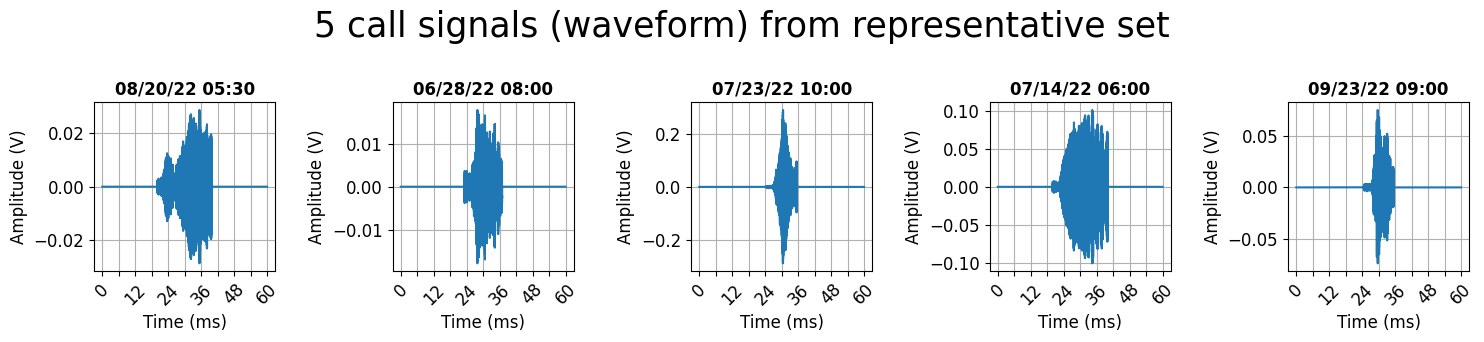

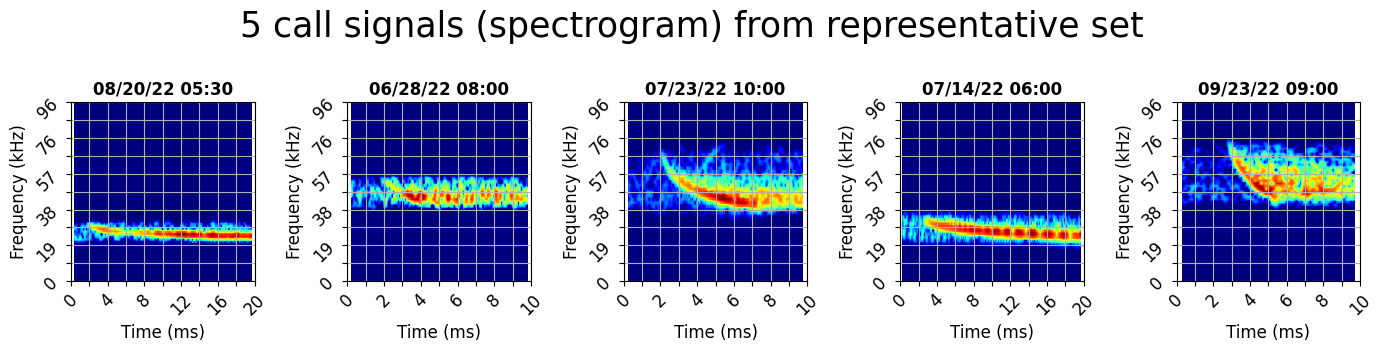

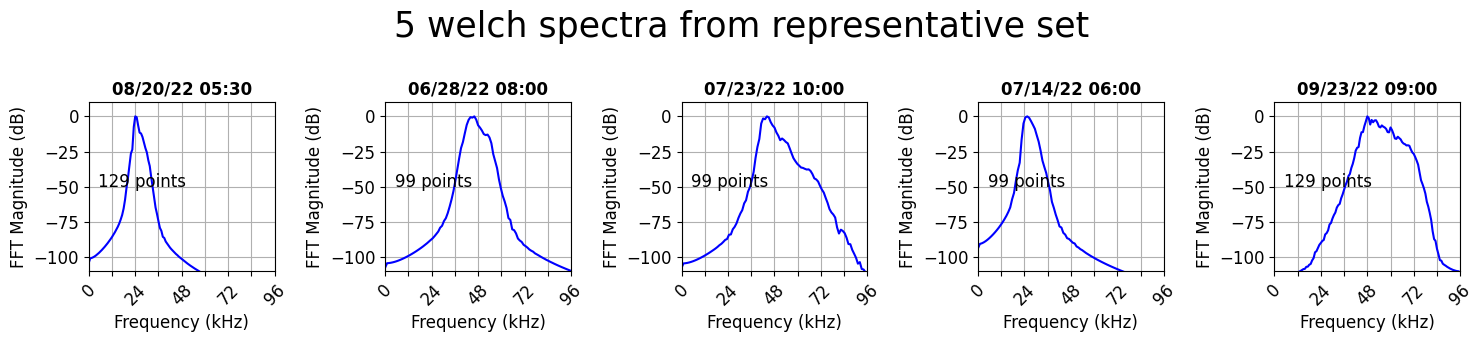

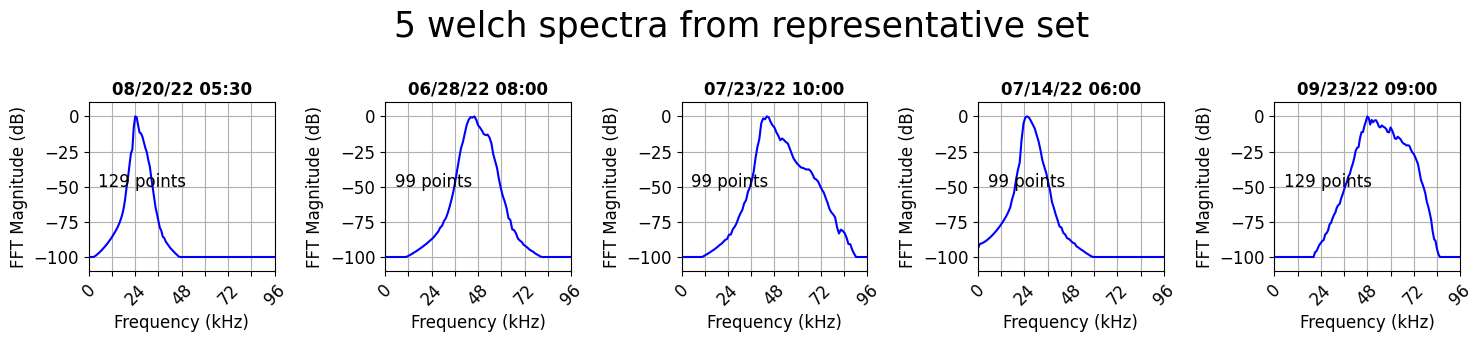

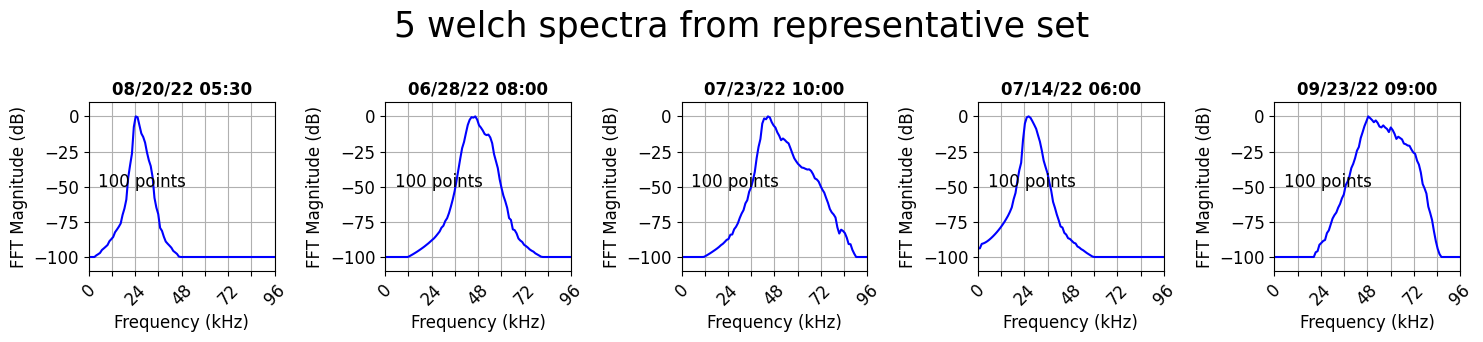

In [87]:
plot_n_calls(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_n_specs(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_n_welch_norm(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_n_welch_thresh(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)
plot_n_welch_interp(call_indices, good_snr_location_calls_sampled, all_sites_call_signals, set_name)